# Central Distance Fourier Descriptor

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def interpolate_points(start, end, num_points):
    """Interpolate points between two vertices."""
    t = np.linspace(0, 1, num_points)
    x = start[0] + (end[0] - start[0]) * t
    y = start[1] + (end[1] - start[1]) * t
    return np.column_stack((x, y))

def get_central_distances(points):
    """Calculate distances from points to origin."""
    return np.sqrt(np.sum(points**2, axis=1))

def calculate_fourier_descriptors(central_distances):
    """Calculate Fourier descriptors using FFT."""
    fourier = np.fft.fft(central_distances)
    magnitudes = np.abs(fourier) / len(central_distances)
    return magnitudes

def generate_polygon_points(num_sides, radius=1, num_points=400):
    """Generate points for a regular polygon."""
    # Calculate vertices
    angles = np.linspace(0, 2*np.pi, num_sides, endpoint=False)
    vertices = radius * np.column_stack((np.cos(angles), np.sin(angles)))
    
    # Points per edge
    points_per_edge = num_points // num_sides
    
    # Generate points along each edge
    all_points = []
    for i in range(num_sides):
        start = vertices[i]
        end = vertices[(i + 1) % num_sides]
        edge_points = interpolate_points(start, end, points_per_edge)
        all_points.append(edge_points)
    
    return np.vstack(all_points)

def plot_shape_analysis(points, central_distances, fourier_magnitudes, shape_name):
    """Create visualization with shape, central distances, and Fourier descriptors."""
    fig = plt.figure(figsize=(15, 10))
    
    # Plot 1: Shape
    ax1 = fig.add_subplot(311)
    ax1.plot(points[:, 0], points[:, 1], 'b-')
    ax1.set_aspect('equal')
    ax1.grid(True)
    ax1.set_title(f'{shape_name} Shape')
    
    # Plot 2: Central Distances
    ax2 = fig.add_subplot(312)
    angles = np.linspace(0, 360, len(central_distances))
    ax2.plot(angles, central_distances)
    ax2.set_xlabel('Angle (degrees)')
    ax2.set_ylabel('Distance from Center')
    ax2.grid(True)
    ax2.set_title('Central Distances')
    
    # Plot 3: Fourier Descriptors
    ax3 = fig.add_subplot(313)
    normalized_magnitudes = fourier_magnitudes / fourier_magnitudes[0]
    indices = np.arange(20)  # Show first 20 descriptors
    ax3.bar(indices, normalized_magnitudes[:20])
    ax3.set_xlabel('Descriptor Index')
    ax3.set_ylabel('Normalized Magnitude')
    ax3.grid(True)
    ax3.set_title('Fourier Descriptors')
    
    plt.tight_layout()
    return fig

# Example usage for different shapes
def analyze_shape(num_sides, shape_name):
    # Generate shape points
    points = generate_polygon_points(num_sides)
    
    # Calculate central distances
    distances = get_central_distances(points)
    
    # Calculate Fourier descriptors
    descriptors = calculate_fourier_descriptors(distances)
    
    # Create visualization
    fig = plot_shape_analysis(points, distances, descriptors, shape_name)
    
    # Print significant terms
    normalized_desc = descriptors / descriptors[0]
    significant = np.where(normalized_desc > 0.01)[0]
    print(f"\nSignificant Fourier terms for {shape_name}:")
    for idx in significant[:5]:  # Show top 5 significant terms
        print(f"F({idx}): {normalized_desc[idx]:.4f}")
    
    return fig

# Analyze different shapes
shapes = {
    3: "Equilateral Triangle",
    4: "Square",
    5: "Pentagon",
}



Significant Fourier terms for Equilateral Triangle:
F(0): 1.0000
F(3): 0.1564
F(6): 0.0257
F(9): 0.0126
F(390): 0.0126


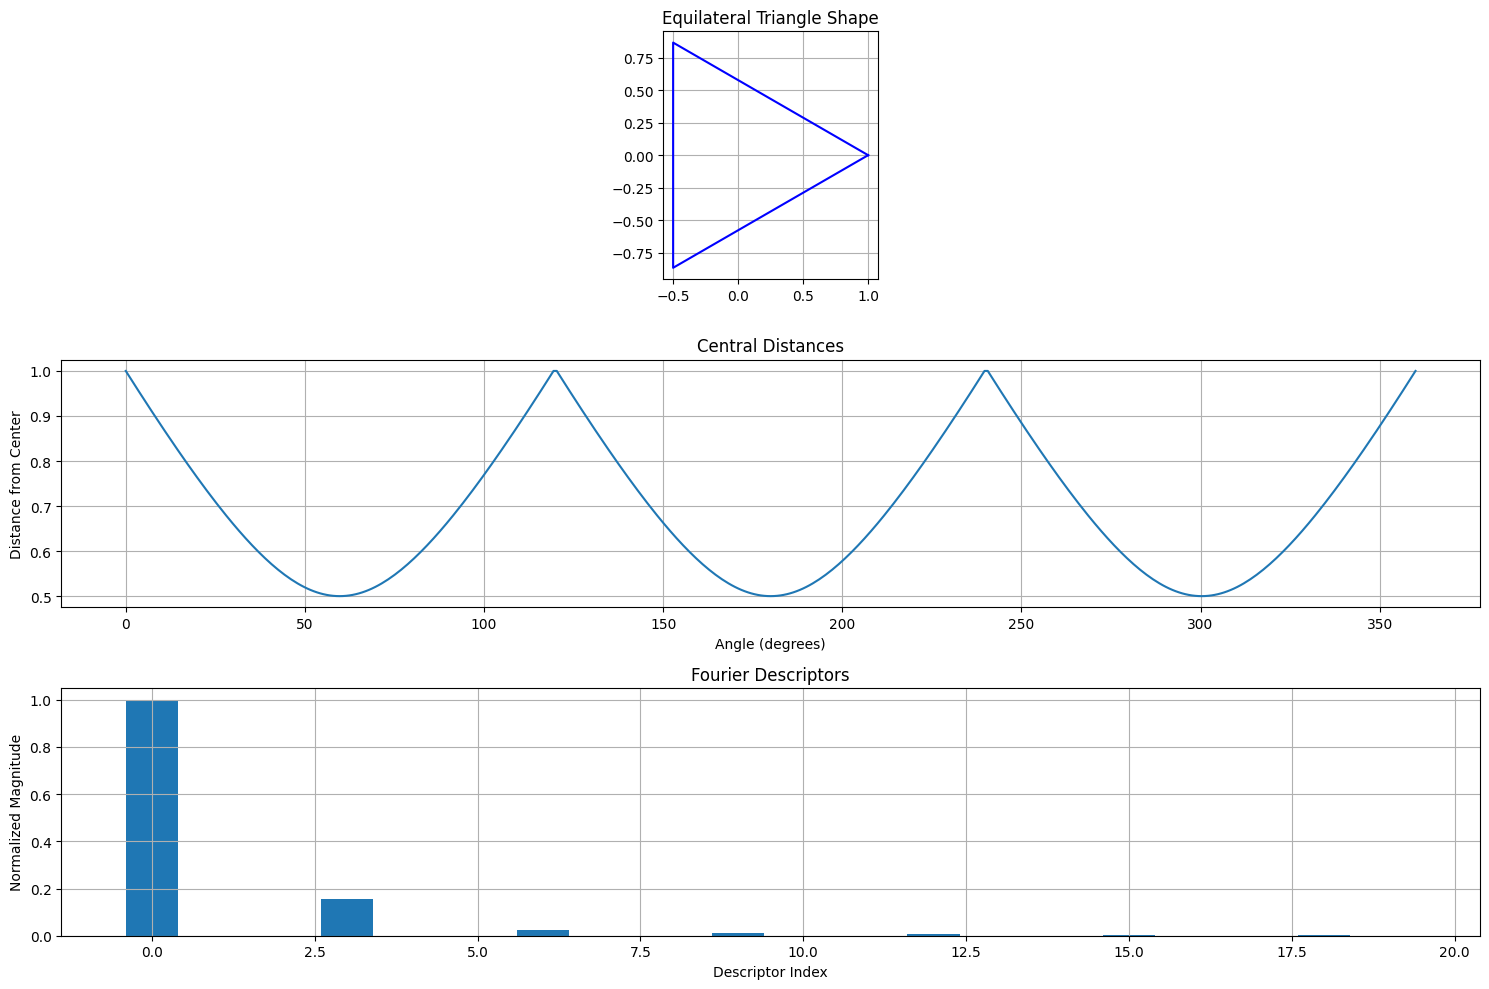


Significant Fourier terms for Square:
F(0): 1.0000
F(4): 0.0767
F(8): 0.0159
F(392): 0.0159
F(396): 0.0767


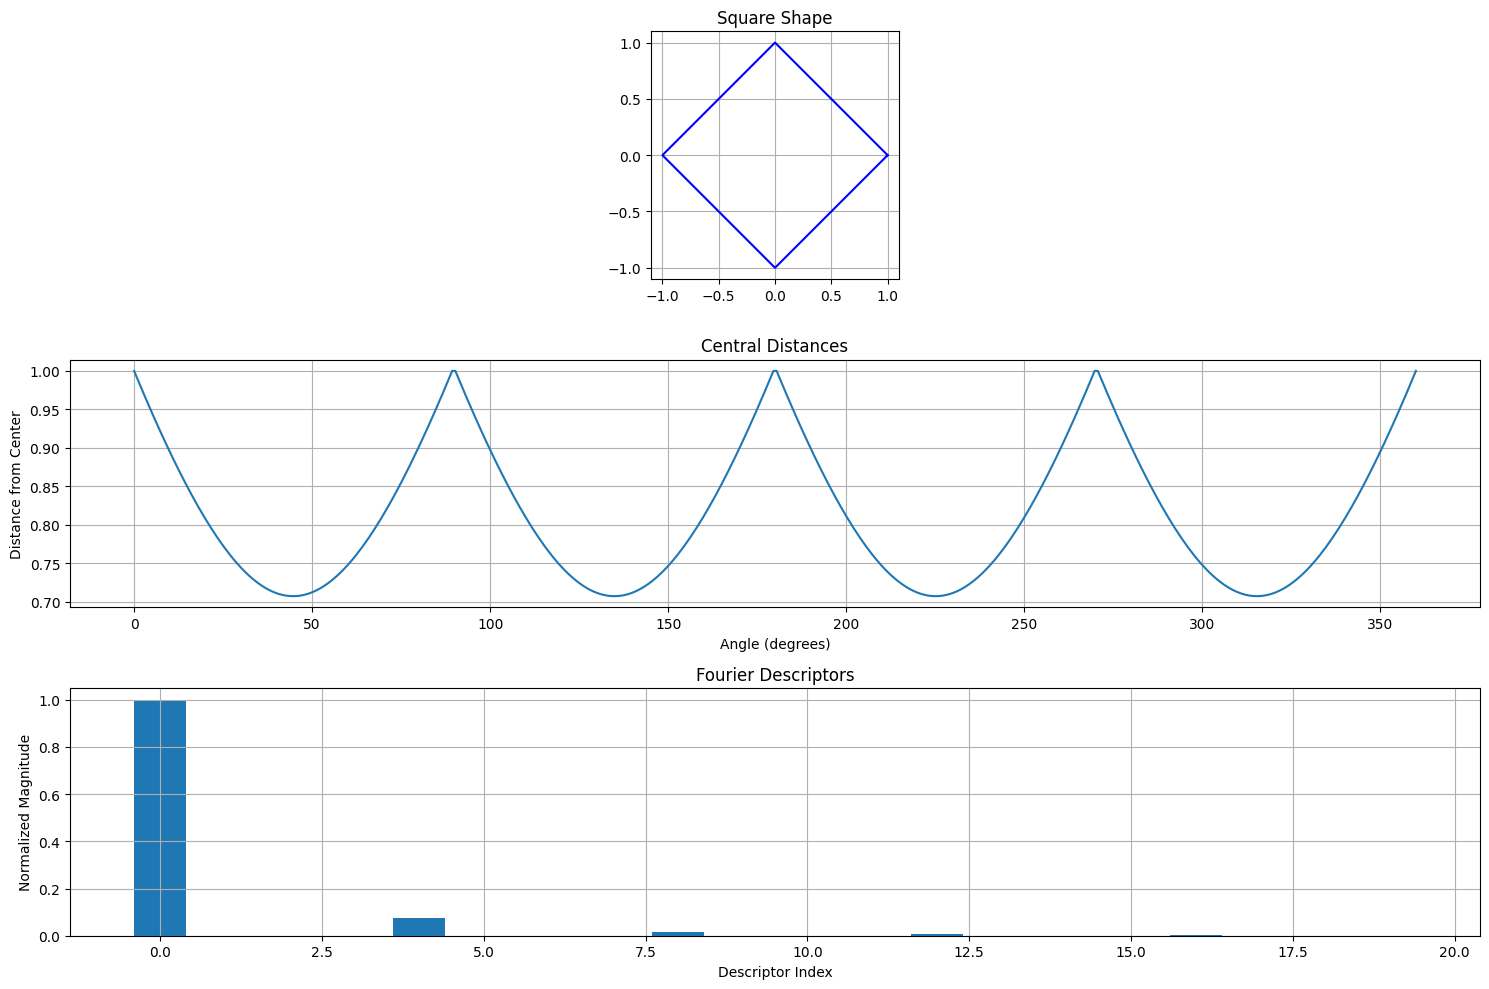


Significant Fourier terms for Pentagon:
F(0): 1.0000
F(5): 0.0461
F(10): 0.0103
F(390): 0.0103
F(395): 0.0461


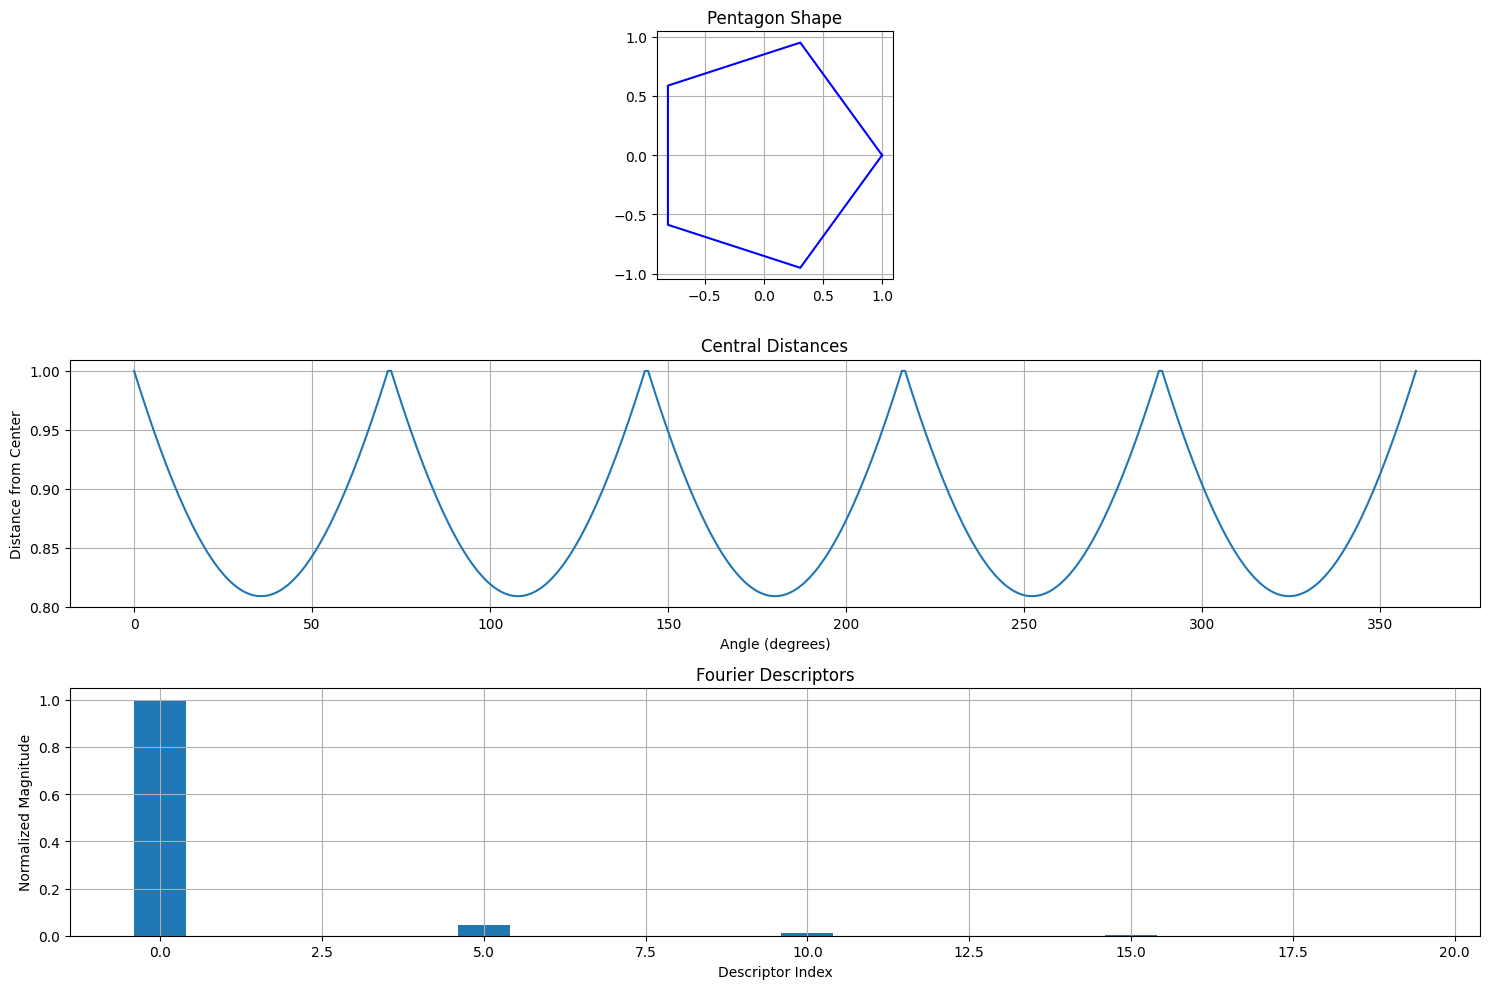

In [6]:
for num_sides, name in shapes.items():
    fig = analyze_shape(num_sides, name)
    plt.show()

```
Final Results:
Average accuracy: 0.383 ± 0.081
Random chance would give: 0.167

Confusion Matrix (rows=true class, columns=predicted class):
True \ Pred |  arch   |  fish   | triangle |  cross  | square  | circle 
--------------------------------------------------------------------------------
   arch    |   0.600 |   0.157 |   0.114 |   0.114 |   0.000 |   0.014
   fish    |   0.186 |   0.200 |   0.200 |   0.414 |   0.000 |   0.000
 triangle  |   0.100 |   0.186 |   0.243 |   0.414 |   0.000 |   0.057
  cross    |   0.143 |   0.071 |   0.100 |   0.671 |   0.014 |   0.000
  square   |   0.043 |   0.086 |   0.043 |   0.243 |   0.571 |   0.014
  circle   |   0.343 |   0.114 |   0.314 |   0.200 |   0.014 |   0.014
```

# Exercise 6
Cross receives many false positives - other shapes (particularly fish and triangles) are often misclassified as crosses.
Around 41.4% of both fish and triangles are incorrectly labeled as crosses. This could happen because:
- Crosses have straight lines and corners like many other shapes
- The feature extraction might be picking up on edge intersections, which crosses, triangles and fish all have


Circles have very poor recognition (only 1.4% correct) and are often confused for:
- Arches (34.3% of circles classified as arches)
- Triangles (31.4% of circles classified as triangles)

This likely occurs because the shape representation doesn't capture curvature very well and sensitive to noise that creates corner-like features in curved shapes


Fish and triangles show similar confusion patterns:
- Both are heavily misclassified as crosses (~41%)
- Both have moderate confusion with each other

This suggests the feature extraction might be overly sensitive to corner features and not capturing the overall shape topology well

The fundamental issue seems to be that the shape representation being used might be too focused on local features (corners, edges) rather than global shape properties (overall contour, topology). This makes it hard to distinguish between shapes that share similar local features but have different overall structures.

# Exercise 7
Centroid-based FD results:
```
Average accuracy: 0.233 ± 0.049
True\ Pred |    arch |    fish | triangle|   cross |  square |  circle 
   arch    |   0.000 |   0.229 |   0.000 |   0.000 |   0.300 |   0.471
   fish    |   0.029 |   0.414 |   0.071 |   0.000 |   0.143 |   0.343
 triangle  |   0.029 |   0.257 |   0.014 |   0.043 |   0.271 |   0.386
  cross    |   0.000 |   0.329 |   0.071 |   0.014 |   0.257 |   0.329
  square   |   0.057 |   0.057 |   0.000 |   0.057 |   0.729 |   0.100
  circle   |   0.029 |   0.300 |   0.086 |   0.057 |   0.300 |   0.229
```

Curvature-based FD results:
```
Average accuracy: 0.383 ± 0.081
True\ Pred |    arch |    fish | triangle|   cross |  square |  circle 
   arch    |   0.600 |   0.157 |   0.114 |   0.114 |   0.000 |   0.014
   fish    |   0.186 |   0.200 |   0.200 |   0.414 |   0.000 |   0.000
 triangle  |   0.100 |   0.186 |   0.243 |   0.414 |   0.000 |   0.057
  cross    |   0.143 |   0.071 |   0.100 |   0.671 |   0.014 |   0.000
  square   |   0.043 |   0.086 |   0.043 |   0.243 |   0.571 |   0.014
  circle   |   0.343 |   0.114 |   0.314 |   0.200 |   0.014 |   0.014
```

Centroid-based FD strengths:
- Excellent at recognizing squares (72.9%)
- Decent at recognizing fish (41.4%)
- Good when shapes have distinctive radial patterns from their center
- Works well for shapes with consistent distance patterns from their center point

Centroid-based FD weaknesses:
- Terrible at recognizing arches (0%)
- Poor at crosses (1.4%)
- Tends to confuse many shapes with circles
- Loses information about local features

Curvature-based FD strengths:
- Much better overall accuracy (38.3% vs 23.3%)
- Very good at recognizing crosses (67.1%)
- Good at recognizing arches (60%)
- Good at squares (57.1%)
- Better at capturing local shape features and corners

Curvature-based FD weaknesses:
- Poor at recognizing circles (1.4%)
- Moderate confusion between fish and crosses
- Some confusion between triangles and crosses

The key difference seems to be that:
- Centroid-based FD captures global shape properties based on distance from center
- Curvature-based FD captures local shape properties like corners and curves

This explains why curvature-based works better for shapes with distinctive local features (crosses, arches) while centroid-based works better for shapes with distinctive radial patterns (squares).